In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
import seaborn as sns

In [2]:
data = pd.read_stata('binary.dta')

print(data.shape)
data.head()

(400, 4)


,admit,gre,gpa,rank
0,0.0,380.0,3.61,3.0
1,1.0,660.0,3.67,3.0
2,1.0,800.0,4.00,1.0
3,1.0,640.0,3.19,4.0
4,0.0,520.0,2.93,4.0


In [3]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

In [5]:
data = data.astype({"admit" : int, 'rank' : int, "gre": int})

In [6]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [7]:
feature_cols = ['gre','gpa','rank']
x = data[feature_cols]
y = data.admit

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=5)

In [9]:
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(320, 3)

(320,)

(80, 3)

(80,)

In [10]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [11]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', conf_mat)

Accuracy_Score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: ', Accuracy_Score)
print('Accuracy in Percentage: ', int(Accuracy_Score *100), '%')

Confusion Matrix:  [[50  4]
 [23  3]]
Accuracy Score:  0.6625
Accuracy in Percentage:  66 %


<Axes: xlabel='Predicted', ylabel='Actual'>

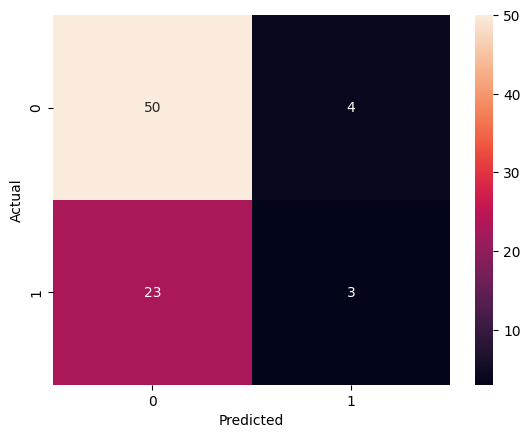

In [13]:
conf_mat = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames= ['Predicted'])

sns.heatmap(conf_mat, annot= True)